In [1]:
#Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

In [2]:
#sklearn dependencies
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings('ignore')

In [3]:
# #Read demographic csv
# diabetes_data = pd.read_csv('demographic_clean_data.csv')
# diabetes_data.head()

In [4]:
#Read diabetes csv
diabetes_data = pd.read_csv('diabetes_clean_data.csv')
diabetes_data.head()

,ID,AgeToldDiabetes,LenTakingInsulin,SeenDocPastYr,#ChkGlucose,DocDBPread,DocSBPread,RcntLDL#,DocLDLread,DocChkFeet#,...,OneDocDia,UOMd_w_m_y,PastYrChkA1C,LastA1Clvl,DocSayA1C,RcntDBP,RcntSBP,UOMd_w_m_yDocRcntDBPsbp,LastPupilsDilated,SEQN
0,0,0,0,0.0,0.0,0,0,0,0,0.0,...,0,0,0,0.0,0,0,0,0,0,51624
1,1,0,0,0.0,0.0,0,0,0,0,0.0,...,0,0,0,0.0,0,0,0,0,0,51625
2,2,0,0,0.0,0.0,0,0,0,0,0.0,...,0,0,0,0.0,0,0,0,0,0,51626
3,3,0,0,0.0,0.0,0,0,0,0,0.0,...,0,0,0,0.0,0,0,0,0,0,51627
4,4,56,0,4.0,1.0,0,0,0,0,4.0,...,1,1,0,0.0,0,0,0,1,4,51628


In [5]:
#Read nutrition csv
nutrition_data = pd.read_csv('nutrition_clean.csv')
nutrition_data.head()

,ID,ALCOHOL,B12_ADDED,CAFFEINE,CARBOHYDRATES,CHOLESTEROL,FIBER,IRON,CALORIES,FOODCOMPONENT,...,SODIUM,SUGAR,TRANS_FAT,B12,VITAMIN_D,DRABF,DRDINT,SEQN,WTDR2D,WTDRD1
0,0,0.0,0.0,533,0.00,0,0.0,0.13,13,1,...,27,0.00,0.27,0.0,0.0,2,2,51624,182302.928,171886.803
1,1,0.0,0.0,0,0.53,0,0.0,0.07,4,2,...,14,0.00,0.00,0.0,0.0,2,2,51624,182302.928,171886.803
2,2,0.0,0.0,0,28.59,0,5.0,0.25,108,3,...,2,21.51,0.35,0.0,0.0,2,2,51624,182302.928,171886.803
3,3,0.0,0.0,0,35.03,0,7.2,0.30,140,4,...,0,27.88,0.36,0.0,0.0,2,2,51624,182302.928,171886.803
4,4,0.0,0.0,0,0.53,0,0.0,0.07,4,5,...,14,0.00,0.00,0.0,0.0,2,2,51624,182302.928,171886.803


In [6]:
#Pandas get_dummies to convert categorical data
diabetes_data = pd.get_dummies(diabetes_data)
nutrition_data = pd.get_dummies(nutrition_data)
#demographic_data = pd.get_dummies(demographic_data)

In [7]:
diabetes_data = diabetes_data.apply(np.int64)
diabetes_data.head()

,ID,AgeToldDiabetes,LenTakingInsulin,SeenDocPastYr,#ChkGlucose,DocDBPread,DocSBPread,RcntLDL#,DocLDLread,DocChkFeet#,...,OneDocDia,UOMd_w_m_y,PastYrChkA1C,LastA1Clvl,DocSayA1C,RcntDBP,RcntSBP,UOMd_w_m_yDocRcntDBPsbp,LastPupilsDilated,SEQN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,51624
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,51625
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,51626
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,51627
4,4,56,0,4,1,0,0,0,0,4,...,1,1,0,0,0,0,0,1,4,51628


In [8]:
diabetes_data.dtypes

ID                         int64
AgeToldDiabetes            int64
LenTakingInsulin           int64
SeenDocPastYr              int64
#ChkGlucose                int64
DocDBPread                 int64
DocSBPread                 int64
RcntLDL#                   int64
DocLDLread                 int64
DocChkFeet#                int64
PrsnlChkFeet               int64
DocToldDiabetes            int64
TakeInsulin                int64
UOMmmyy                    int64
TakePillsLwrBS             int64
DiaAffectEyes              int64
EvrToldPreDia              int64
EvrToldPreDia(Bi)          int64
EvrToldHeaRskDia           int64
FeelRiskForDia             int64
FamHistory                 int64
Overweight                 int64
Age                        int64
PoorDiet                   int64
Race                       int64
HadBabyOvr9lb              int64
LackOfPhyAct               int64
HighBP                     int64
HighBS                     int64
HighChol                   int64
Hypoglycem

In [9]:
nutrition_data = nutrition_data.apply(np.int64)
nutrition_data.head()

,ID,ALCOHOL,B12_ADDED,CAFFEINE,CARBOHYDRATES,CHOLESTEROL,FIBER,IRON,CALORIES,FOODCOMPONENT,...,SODIUM,SUGAR,TRANS_FAT,B12,VITAMIN_D,DRABF,DRDINT,SEQN,WTDR2D,WTDRD1
0,0,0,0,533,0,0,0,0,13,1,...,27,0,0,0,0,2,2,51624,182302,171886
1,1,0,0,0,0,0,0,0,4,2,...,14,0,0,0,0,2,2,51624,182302,171886
2,2,0,0,0,28,0,5,0,108,3,...,2,21,0,0,0,2,2,51624,182302,171886
3,3,0,0,0,35,0,7,0,140,4,...,0,27,0,0,0,2,2,51624,182302,171886
4,4,0,0,0,0,0,0,0,4,5,...,14,0,0,0,0,2,2,51624,182302,171886


In [10]:
nutrition_data.dtypes

ID                   int64
ALCOHOL              int64
B12_ADDED            int64
CAFFEINE             int64
CARBOHYDRATES        int64
CHOLESTEROL          int64
FIBER                int64
IRON                 int64
CALORIES             int64
FOODCOMPONENT        int64
MAGNESIUM            int64
MONOSATURATED_FAT    int64
POTASSIUM            int64
PROTEIN              int64
SATURATED_FAT        int64
SODIUM               int64
SUGAR                int64
TRANS_FAT            int64
B12                  int64
VITAMIN_D            int64
DRABF                int64
DRDINT               int64
SEQN                 int64
WTDR2D               int64
WTDRD1               int64
dtype: object

In [11]:
#Merge
diabetes_nutr = nutrition_data.merge(diabetes_data,how='inner',on='SEQN')
diabetes_nutr.head()

,ID_x,ALCOHOL,B12_ADDED,CAFFEINE,CARBOHYDRATES,CHOLESTEROL,FIBER,IRON,CALORIES,FOODCOMPONENT,...,LenSeenDiaSpec,OneDocDia,UOMd_w_m_y,PastYrChkA1C,LastA1Clvl,DocSayA1C,RcntDBP,RcntSBP,UOMd_w_m_yDocRcntDBPsbp,LastPupilsDilated
0,0,0,0,533,0,0,0,0,13,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,4,2,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,28,0,5,0,108,3,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,35,0,7,0,140,4,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,4,5,...,0,0,0,0,0,0,0,0,0,0


In [12]:
diabetes_nutr.dtypes

ID_x                       int64
ALCOHOL                    int64
B12_ADDED                  int64
CAFFEINE                   int64
CARBOHYDRATES              int64
CHOLESTEROL                int64
FIBER                      int64
IRON                       int64
CALORIES                   int64
FOODCOMPONENT              int64
MAGNESIUM                  int64
MONOSATURATED_FAT          int64
POTASSIUM                  int64
PROTEIN                    int64
SATURATED_FAT              int64
SODIUM                     int64
SUGAR                      int64
TRANS_FAT                  int64
B12                        int64
VITAMIN_D                  int64
DRABF                      int64
DRDINT                     int64
SEQN                       int64
WTDR2D                     int64
WTDRD1                     int64
ID_y                       int64
AgeToldDiabetes            int64
LenTakingInsulin           int64
SeenDocPastYr              int64
#ChkGlucose                int64
          

In [13]:
diabetes_nutr.to_csv('diabetes_nutr.csv')

In [14]:
diabetes_sample = diabetes_nutr.sample(frac=0.05,replace=True,random_state=25)
diabetes_sample.head()

,ID_x,ALCOHOL,B12_ADDED,CAFFEINE,CARBOHYDRATES,CHOLESTEROL,FIBER,IRON,CALORIES,FOODCOMPONENT,...,LenSeenDiaSpec,OneDocDia,UOMd_w_m_y,PastYrChkA1C,LastA1Clvl,DocSayA1C,RcntDBP,RcntSBP,UOMd_w_m_yDocRcntDBPsbp,LastPupilsDilated
29828,545583,0,0,0,69,130,2,0,613,12,...,0,0,0,0,0,0,0,0,0,0
90430,54314,0,0,0,13,0,1,5,59,1,...,0,0,0,0,0,0,0,0,0,0
6618,533761,0,0,5,35,1,2,1,184,21,...,0,0,0,0,0,0,0,0,0,0
92303,55441,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
130365,77951,0,0,0,23,1,1,0,248,2,...,0,0,0,0,0,0,0,0,0,0


In [15]:
diabetes_sample=diabetes_sample[diabetes_sample['EvrToldPreDia']!=0].copy()

In [16]:
# #Variables, target & shape
# X = diabetes_nutr[['Overweight','Age','PoorDiet','Race','LackOfPhyAct','HighBP','HighBS','HighChol']] #Variable
# y = diabetes_nutr['EvrToldPreDia(Bi)'].values.reshape(-1,1) #test
# print (X.shape, y.shape)

In [17]:
# #Variables, target & shape
# X = diabetes_nutr[['ALCOHOL','B12_ADDED','CAFFEINE','CARBOHYDRATES','CHOLESTEROL','FIBER','IRON','CALORIES','FOODCOMPONENT','MAGNESIUM','MONOSATURATED_FAT','POTASSIUM','PROTEIN','SATURATED_FAT','SODIUM','SUGAR']] #Variable
# y = diabetes_nutr['EvrToldPreDia(Bi)'].values.reshape(-1,1) #test
# print (X.shape, y.shape)

In [18]:
#Variables, target & shape
X = diabetes_sample[['SATURATED_FAT','MONOSATURATED_FAT']] #Variable
y = diabetes_sample['EvrToldPreDia'].values.reshape(-1) #test
print (X.shape, y.shape)

(6521, 2) (6521,)


In [19]:
diabetes_sample['EvrToldPreDia'].value_counts()

2    6219
1     302
Name: EvrToldPreDia, dtype: int64

In [20]:
print(f"labels: {y[:10]}")
print(f"data: {X[:10]}")

labels: [2 2 2 1 2 2 2 2 2 2]
data:         SATURATED_FAT  MONOSATURATED_FAT
29828              20                  8
90430               0                  0
6618                1                  2
35702               6                  6
165015              0                  0
190386              0                  0
21245              10                  5
99464               0                  0
138396              0                  0
85245               0                  0


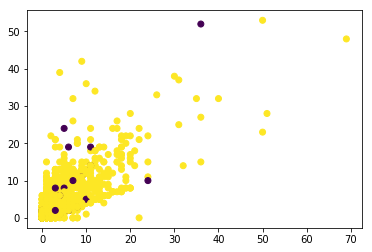

In [21]:
plt.scatter(X.iloc[:,0], X.iloc[:, 1], c=y)

In [22]:
#Training and Testing
#X=Variable & y=target
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=25)

In [23]:
#Create a StandardScater model and fit training
X_scaler = StandardScaler().fit(X_train)
#y_scaler = StandardScaler().fit(y_train) #y already binary? ML day 2


In [24]:
#
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
#y_train_scaled = y_scaler.transform(y_train)
#y_test_scaled = y_scaler.transform(y_test)

In [25]:
#LinearRegression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.9558282208588957
Testing Data Score: 0.947271612507664


In [27]:
print(X_train.shape, X_test.shape)

(4890, 2) (1631, 2)


In [28]:
print(y_train.shape, y_test.shape)

(4890,) (1631,)


In [29]:
print(X_train_scaled.shape, X_test_scaled.shape)

(4890, 2) (1631, 2)


In [30]:
#print(y_train_scaled.shape, y_test_scaled.shape)

In [31]:
#Make prediction
#Use X_test_scaled data
#Plot y_test_scaled vs predictions

#Random slice of model - exiting matplot or principal component analysis python

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled,y_train)
# plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
# plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
# plt.title("Residual Plot")
# plt.show()
# plt.scatter(X[:,0], X[:,1], c=y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
#MSE & r2
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test_scaled, y_test)
print(f'MSE:{MSE}, R2: {r2}')

MSE:0.05272838749233599, R2: 0.947271612507664


In [33]:
#Lasso model
lasso = Lasso(alpha=.01).fit(X_train_scaled,y_train)
predictions = lasso.predict(X_test_scaled)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test_scaled, y_test)
print(f'MSE:{MSE}, R2: {r2}')

MSE:0.050021320191270424, R2: 0.947271612507664


In [34]:
#Ridge model
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train)
predictions = ridge.predict(X_test_scaled)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test_scaled, y_test)
print(f'MSE:{MSE}, R2: {r2}')

MSE:0.05000996742854725, R2: 0.947271612507664


In [35]:
#ElasticNet model
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train)
predictions = elasticnet.predict(X_test_scaled)
MSE = mean_squared_error(y_test, predictions)
r2 = elasticnet.score(X_test_scaled,y_test)
print(f'MSE:{MSE}, R2: {r2}')

MSE:0.050021320191270424, R2: -0.0014658323273131213
